# Basic Models - Logistic Regression
A logistic regression learning algorithm using tensorflow mnist dataset.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data 

mnist = input_data.read_data_sets("/tmp/data", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
print(mnist)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x110e47630>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11354beb8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1142f4710>)


In [3]:
# Display an image from mnist dataset

def gen_image(arr):
    twoD = (np.reshape(arr,(28,28))* 255).astype(np.uint8)
    plt.imshow(twoD, interpolation='nearest')
    return plt.show()


# Let's get the data from dataset.
batch_xs, batch_ys = mnist.test.next_batch(10)
print("Mnist_dataset input data : ",batch_xs)
print("Mnist_dataset targeted data : ", batch_ys)

# HERE #
# batch_xs : An input data for training
# batch_ys : An targeted data for model


Mnist_dataset input data :  [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Mnist_dataset targeted data :  [[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


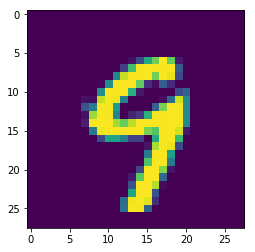

In [4]:
# Let's plot our image
gen_image(batch_xs[3])

In [5]:
# Hyperparameters
learning_rate = 0.01
training_epochs = 100
batch_size = 20
display_step = 1

In [6]:
# Define placeholder in tensorflow for storing image and it's desired output
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image has shape 28 x 28 = 784
y = tf.placeholder(tf.float32, [None, 10]) # mnist dataset has only 10 classes. 0 to 9.

### Logistic regression follows similar formula as linear regression. 
***
$ y = Wx + b $<br>
<br>
where W : Weights of the model , b : Bias of the model<br>

In [7]:
# Create weights and biases. Let's initalize it to zero. 
W = tf.Variable(tf.zeros([784,10]), name='weights')
# W = tf.Variable(tf.random_normal(shape=[784,10], stddev = 0.01), name = "weights")
b = tf.Variable(tf.zeros([10]), name='Bias')

In [8]:
# It's time to construct a model now. 
# As we know, our model is similar to linear regression model. Let's write it down.

pred_Y = tf.nn.softmax(tf.matmul(x, W) + b)

### Error reduction function A.K.A. loss function

>We have predicted value from our model is 'pred_Y', which should be same as actual value 'y'. _But_ as our model is undertraining, we might expect different value. <br> 
So, to reduce this error, we need to feed our network with feedback mechanism. <br>
Here, we uses mean square error (MSE) to reduce the loss. <br>
![title](MSE.png)

In [9]:
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred_Y), reduction_indices=1))

### Gradient Descent Optimizer
<br>
- _Gradient_ : It is multi-variable generalization vector of _derivative_ $dy/dx$.<br>
    - which means, rate of change of _y with respect to x_.<br>

Optimizer uses to get slightly better and faster learning by updating the model parameters such as _Weights_ and _Bias_ values.

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
init = tf.global_variables_initializer()

# Start Session
with tf.Session() as sess:
    
    # Run initializer
    sess.run(init)
    
    # TRAINING
    for epoch in range(training_epochs):
        
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Batch wise training
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Let's run optimizer and cost operation
            dummy_1, c = sess.run((optimizer, cost), feed_dict = {x: batch_xs, y:batch_ys})
            
            avg_cost += c/total_batch
        
        
        # Log Steps
        if (epoch + 1) % display_step == 0:
            print("Epoch: ", '%04d' % (epoch+1), "Cost: ", "{:9f}".format(avg_cost))
        
    print("Congo, Model has been Trained")
    
    
    ###################
    ## MODEL TESTING ##
    ###################
    
    correct_pred = tf.equal(tf.arg_max(pred_Y, 1), tf.arg_max(y , 1))
    
    # Calculate accuracy or model

    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("Accuracy of Model: ", acc.eval({x:mnist.test.images, y: mnist.test.labels}))

Epoch:  0001 Cost:   0.676055
Epoch:  0002 Cost:   0.416618
Epoch:  0003 Cost:   0.374715
Epoch:  0004 Cost:   0.353241
Epoch:  0005 Cost:   0.339711
Epoch:  0006 Cost:   0.329803
Epoch:  0007 Cost:   0.322519
Epoch:  0008 Cost:   0.316584
Epoch:  0009 Cost:   0.311570
Epoch:  0010 Cost:   0.307551
Epoch:  0011 Cost:   0.304089
Epoch:  0012 Cost:   0.300892
Epoch:  0013 Cost:   0.298159
Epoch:  0014 Cost:   0.295765
Epoch:  0015 Cost:   0.293571
Epoch:  0016 Cost:   0.291664
Epoch:  0017 Cost:   0.289673
Epoch:  0018 Cost:   0.288168
Epoch:  0019 Cost:   0.286753
Epoch:  0020 Cost:   0.285205
Epoch:  0021 Cost:   0.283909
Epoch:  0022 Cost:   0.282651
Epoch:  0023 Cost:   0.281570
Epoch:  0024 Cost:   0.280325
Epoch:  0025 Cost:   0.279387


KeyboardInterrupt: 